# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [2]:
#importing all the library functions
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [6]:
#alpha = 0.05
from scipy.stats            import ttest_1samp, ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
GPU1_N= np.size(GPU1)
GPU1_Xbar = np.mean(GPU1)
GPU1_S = np.std(GPU1, ddof=1)
GPU1_SE = GPU1_S/np.sqrt(GPU1_N)
print("What are the critical values?\n")
print("Sample Mean: %2.1f" %(GPU1_Xbar))
print("SD: %2.1f" %(GPU1_S))
print("Standard Error: ", GPU1_SE)
t_statistic, p_value = ttest_1samp(GPU1, GPU1_Xbar)
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)
print("P-Value is greater than 5% hence (alternate hypothesis) failed to reject null.")

What are the critical values?

Sample Mean: 10.3
SD: 1.2
Standard Error:  0.3034196632775998
T-Statistic:  0.0
P-Value:  1.0
P-Value is greater than 5% hence failed to reject null.


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [8]:
#alpha = 0.05
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU2)
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)
print("P-Value is less than 5% hence (null hypothesis) success to reject null.")

T-Statistic:  -2.5422940006896315
P-Value:  0.02346537162637542
P-Value is less than 5% hence (null hypothesis) success to reject null.


## Question 3

He is trying a third GPU - GPU3.

In [10]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [11]:
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU3)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("P-Value is greater than 5% hence (alternate hypothesis) failed to reject null.")

T-Statistic =  -1.585355832526882
P-Value =  0.13520778142018045
P-Value is greater than 5% hence (alternate hypothesis) failed to reject null.


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [13]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [17]:
from scipy.stats import levene
print("What are the critical values?")
print("e1_Sample Mean = ", (np.mean(e1)))
print("e2_Sample Mean = ", (np.mean(e2)))
print("e3_Sample Mean = ", (np.mean(e3)))
print("\nLevene Test")
t_statistic, p_value = levene(e1, e2, e3)
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)
print("P-Value is greater than 5% hence (alternate hypothesis) failed to reject null.")

What are the critical values?
e1_Sample Mean =  0.7537925
e2_Sample Mean =  1.69759475
e3_Sample Mean =  0.7444685

Levene Test
T-Statistic:  2.6741725711150446
P-Value:  0.12259792666001798
P-Value is greater than 5% hence (alternate hypothesis) failed to reject null.


## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

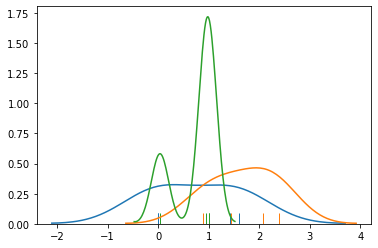


One-Way ANOVA Test
F-Value:  2.51357622845924
P-Value:  0.13574644501798466
P-Value is greater than 0.05 hence (alternate hypothesis) failed to reject null.


In [19]:
#Plotting distribution plot
sns.distplot(e1, hist=False, rug=True)
sns.distplot(e2, hist=False, rug=True)
sns.distplot(e3, hist=False, rug=True)
plt.show()

print("\nOne-Way ANOVA Test")
F, p = stats.f_oneway(e1, e2, e3)
print("F-Value: ", F)
print("P-Value: ", p)
print("P-Value is greater than 0.05 hence (alternate hypothesis) failed to reject null.")

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [ ]:
Type I Error:

When you reject the Null Hypothesis & it comes out to be wrong, it is called as Type I Error. A Type I error can only occur if H0 is true.

Type II Error:

When you reject the Null Hypothesis & it comes out to be wrong, it is called as Type II Error. A Type II error can only occur if H0 is false.

answer here

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


Null Hypothesis : According to the scenario mentioned, the previous month's population mean will have no effect on the        mean of the current month's population mean.

Alternate Hypothesis : According to the alternate hypothesis, there will be a significant change on the current month's population mean.

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [20]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [22]:
import numpy as np
import pandas as pd

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6]) #creating a matrix

print("Total Dice Rolls for Player1: ",np.sum(dice[:,0:1]))
print("Total Dice Rolls for Player2: ",np.sum(dice[:,1:2]))
print("Total Dice Rolls for Player3: ",np.sum(dice[:,2:3]))
print("Total Dice Rolls for Player4: ",np.sum(dice[:,3:4]))
print("Total Dice Rolls: ",np.sum(dice))

Total Dice Rolls for Player1:  36
Total Dice Rolls for Player2:  53
Total Dice Rolls for Player3:  36
Total Dice Rolls for Player4:  30
Total Dice Rolls:  155


In [24]:
#Running a Chi Square Test and Displaying respective results
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("Chi2 Statistics:", chi2_stat)
print("Degree of Freedom:", dof)
print("P-Value:", p_val)
print("\nContingency Table: \n", ex)

Chi2 Statistics: 23.315671914716496
Degree of Freedom: 15
P-Value: 0.07766367301496693

Contingency Table: 
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [26]:
z_scores = stats.zscore(dice, axis=1, ddof=1)
p_values = stats.norm.sf(abs(z_scores))
print("Z-Score")
print(z_scores)
print("P-Value")
print(p_values)
print("P-Mean")
print(np.mean(p_values))

Z-Score
[[-0.40824829  0.81649658 -1.22474487  0.81649658]
 [ 1.09544512 -0.54772256  0.54772256 -1.09544512]
 [ 0.1823492   1.15487828 -0.06078307 -1.27644442]
 [-0.59160798  1.43676223 -0.08451543 -0.76063883]
 [-1.1         1.3         0.1        -0.3       ]
 [ 0.7406129  -1.37542395 -0.10580184  0.7406129 ]]
P-Value
[[0.3415457  0.20710809 0.11033568 0.20710809]
 [0.13666084 0.29194121 0.29194121 0.13666084]
 [0.42765434 0.12407014 0.47576599 0.10089923]
 [0.27705657 0.07539278 0.46632332 0.22343641]
 [0.13566606 0.09680048 0.46017216 0.38208858]
 [0.22946409 0.08450002 0.45786979 0.22946409]]
P-Mean
0.2487469049916935


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [28]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

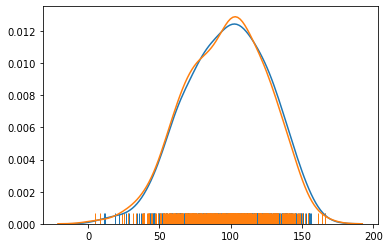

In [29]:
sns.distplot(before, hist=False, rug=True)
sns.distplot(after, hist=False, rug=True)
plt.show()

In [31]:
print("Running the two paired samples TTest\n")
t_statistic, p_value  =  stats.ttest_rel(after, before)
print("T-Statistic = ", t_statistic)
print("P Value = %1.3f" %(p_value))
print("P-Value is less than 5% hence (Null Hypothesis) success to reject null.")

Running the two paired samples TTest

T-Statistic =  -5.998285451576612
P Value = 0.000
P-Value is less than 5% hence (Null Hypothesis) success to reject null.
